In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import datasets, plotting

from cortical_plot import cortical_plot

In [2]:
CSV_PATH = "/Users/stijndeboer/Projects/Protocol_update/protocol_update_code/out/models/main_workflow_model_HBR_bak/results/statistics_train.csv"  


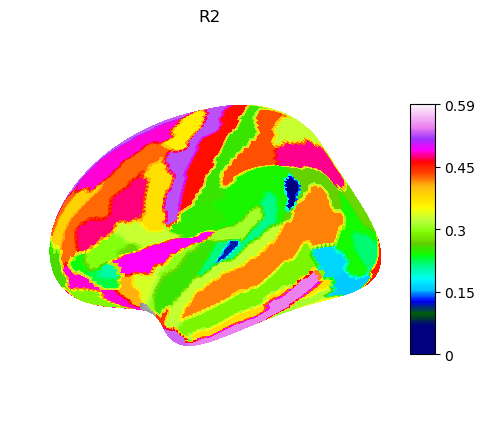

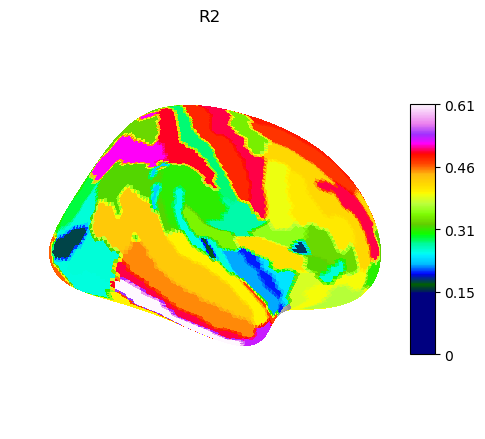

In [3]:
    # --- Load your CSV with multiple score columns ---
df = pd.read_csv(CSV_PATH)
df = df.set_index("statistic").T
df['label'] = df.index
df = df.reset_index(drop=True)

# Split into lh, rh, and other rows
destrieux = df[df['label'].str.endswith('thickness')]
destrieux.loc[:, 'label'] = destrieux['label'].str.replace('&', '_and_').str.replace("_thickness", "")
lh_destrieux = destrieux[destrieux['label'].str.startswith('lh')]
lh_destrieux.loc[:, 'label'] = lh_destrieux['label'].str.replace('lh_', '').replace('lh', '')
lh_destrieux.reset_index(inplace=True, drop=True) 
rh_destrieux = destrieux[destrieux['label'].str.startswith('rh')]
rh_destrieux.loc[:, 'label'] = rh_destrieux['label'].str.replace('rh_', '').replace('rh', '')
rh_destrieux.reset_index(inplace=True, drop=True) 

cortical_plot(lh_destrieux, cols=["R2"], hemisphere="left", view="lateral", cmap="gist_ncar") 
cortical_plot(rh_destrieux, cols=["R2"], hemisphere="right", view="lateral", cmap="gist_ncar") 

In [10]:

other_df = df[~df['label'].str.endswith('thickness')]
other_df.loc[:, "label"] = other_df["label"].str.replace("_thickness", "")
lh_other = other_df[other_df['label'].str.startswith('lh')]
lh_other.loc[:, 'label'] = lh_other['label'].str.replace('lh_', '').replace('lh', '')
lh_other.reset_index(inplace=True, drop=True)
rh_other = other_df[other_df['label'].str.startswith('rh')]
rh_other.loc[:, 'label'] = rh_other['label'].str.replace('rh_', '').replace('rh', '')
rh_other.reset_index(inplace=True, drop=True)
other_remaining = other_df[~other_df['label'].str.startswith(('lh', 'rh'))]
other_remaining.reset_index(inplace=True, drop=True)

In [11]:
l = ['Unknown', 'G_and_S_frontomargin', 'G_and_S_occipital_inf', 'G_and_S_paracentral', 'G_and_S_subcentral', 'G_and_S_transv_frontopol', 'G_and_S_cingul-Ant', 'G_and_S_cingul-Mid-Ant', 'G_and_S_cingul-Mid-Post', 'G_cingul-Post-dorsal', 'G_cingul-Post-ventral', 'G_cuneus', 'G_front_inf-Opercular', 'G_front_inf-Orbital', 'G_front_inf-Triangul', 'G_front_middle', 'G_front_sup', 'G_Ins_lg_and_S_cent_ins', 'G_insular_short', 'G_occipital_middle', 'G_occipital_sup', 'G_oc-temp_lat-fusifor', 'G_oc-temp_med-Lingual', 'G_oc-temp_med-Parahip', 'G_orbital', 'G_pariet_inf-Angular', 'G_pariet_inf-Supramar', 'G_parietal_sup', 'G_postcentral', 'G_precentral', 'G_precuneus', 'G_rectus', 'G_subcallosal', 'G_temp_sup-G_T_transv', 'G_temp_sup-Lateral', 'G_temp_sup-Plan_polar', 'G_temp_sup-Plan_tempo', 'G_temporal_inf', 'G_temporal_middle', 'Lat_Fis-ant-Horizont', 'Lat_Fis-ant-Vertical', 'Lat_Fis-post', 'Medial_wall', 'Pole_occipital', 'Pole_temporal', 'S_calcarine', 'S_central', 'S_cingul-Marginalis', 'S_circular_insula_ant', 'S_circular_insula_inf', 'S_circular_insula_sup', 'S_collat_transv_ant', 'S_collat_transv_post', 'S_front_inf', 'S_front_middle', 'S_front_sup', 'S_interm_prim-Jensen', 'S_intrapariet_and_P_trans', 'S_oc_middle_and_Lunatus', 'S_oc_sup_and_transversal', 'S_occipital_ant', 'S_oc-temp_lat', 'S_oc-temp_med_and_Lingual', 'S_orbital_lateral', 'S_orbital_med-olfact', 'S_orbital-H_Shaped', 'S_parieto_occipital', 'S_pericallosal', 'S_postcentral', 'S_precentral-inf-part', 'S_precentral-sup-part', 'S_suborbital', 'S_subparietal', 'S_temporal_inf', 'S_temporal_sup', 'S_temporal_transverse']

[fetch_atlas_surf_destrieux] Dataset found in /Users/stijndeboer/nilearn_data/destrieux_surface

/var/folders/m8/vtbcb7c96ms3mbjny3b70h3w0000gp/T/ipykernel_31488/2708727901.py:5: UserWarning: 
The following regions are present in the atlas look-up table,
but missing from the atlas image:

 index    name
     0 Unknown

  destrieux = datasets.fetch_atlas_surf_destrieux()
/var/folders/m8/vtbcb7c96ms3mbjny3b70h3w0000gp/T/ipykernel_31488/2708727901.py:5: UserWarning: 
The following regions are present in the atlas look-up table,
but missing from the atlas image:

 index    name
     0 Unknown

  destrieux = datasets.fetch_atlas_surf_destrieux()


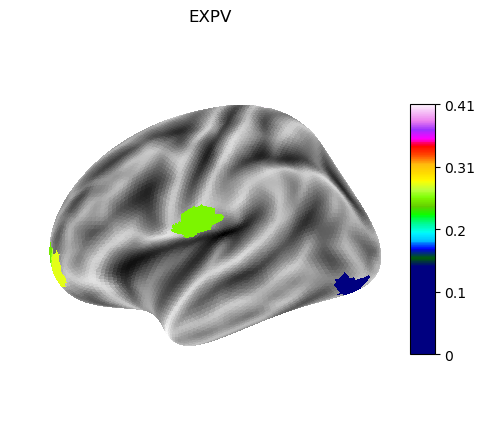

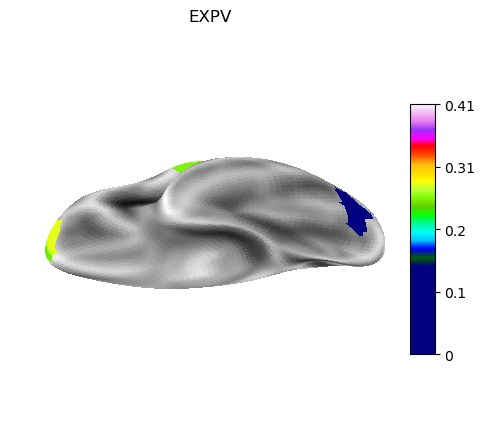

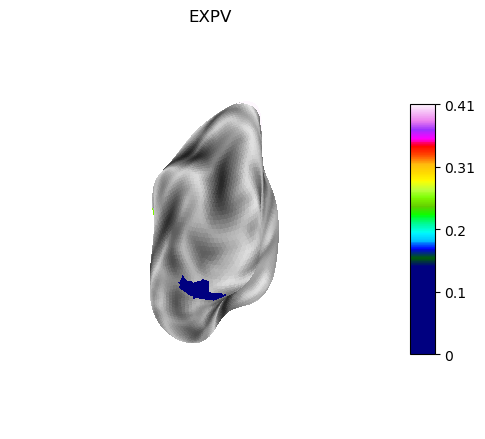

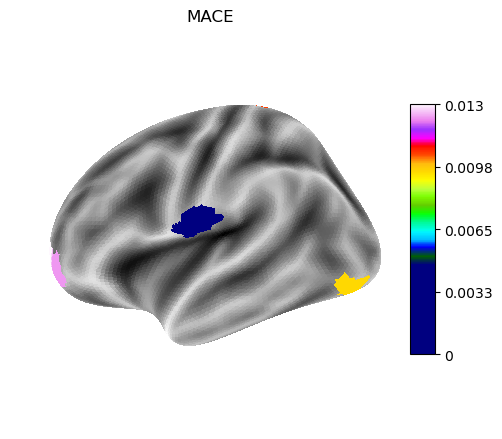

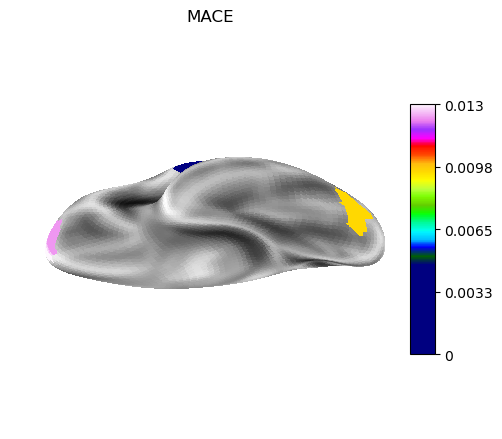

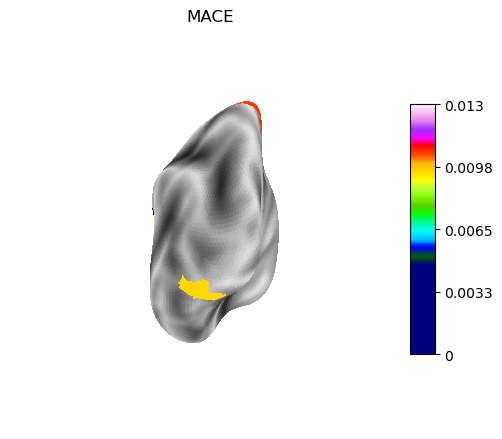

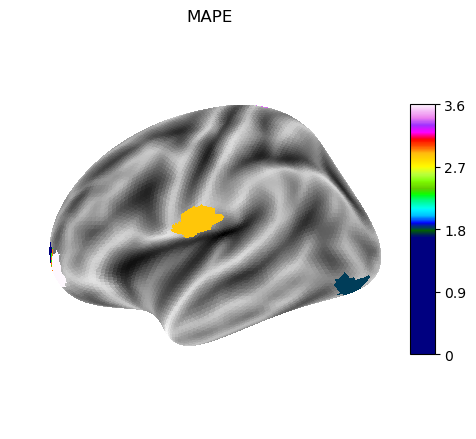

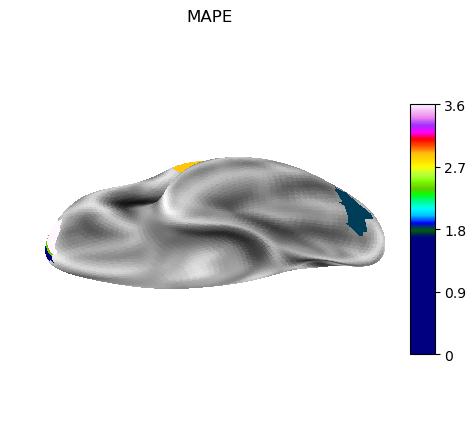

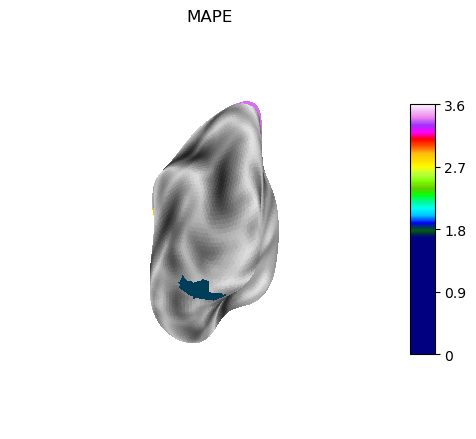

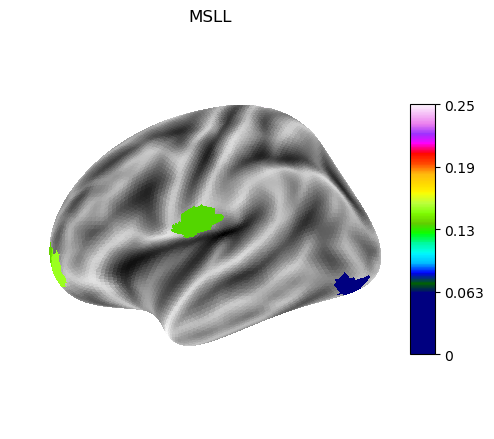

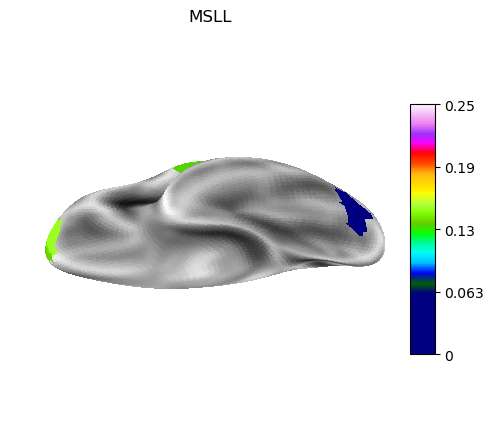

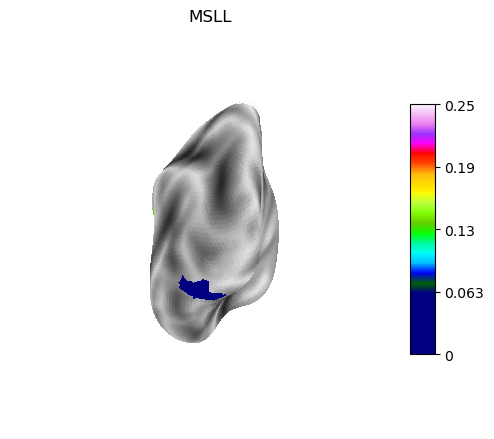

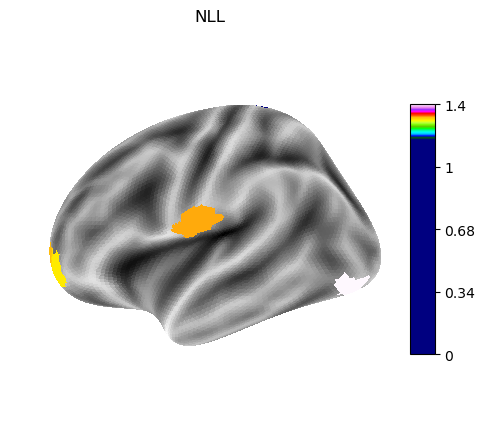

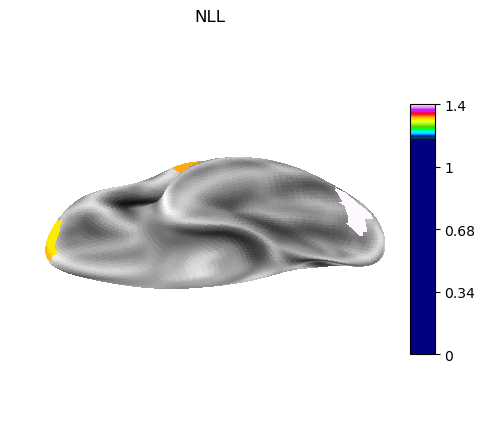

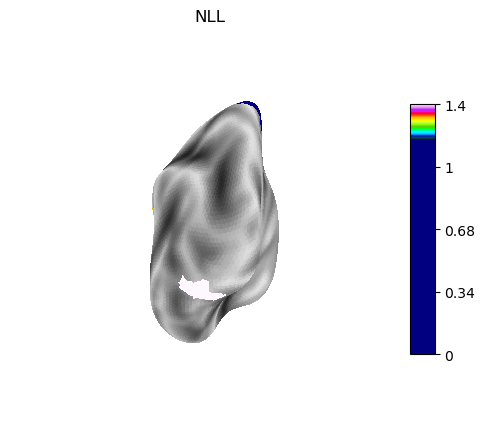

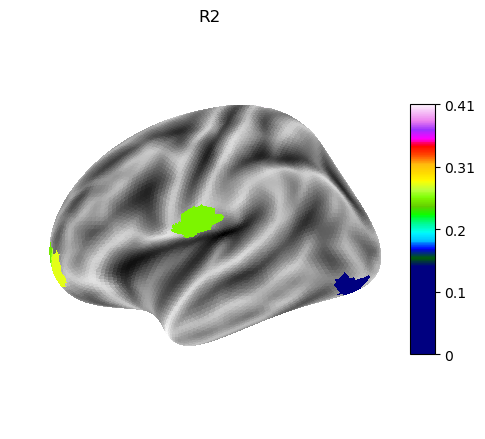

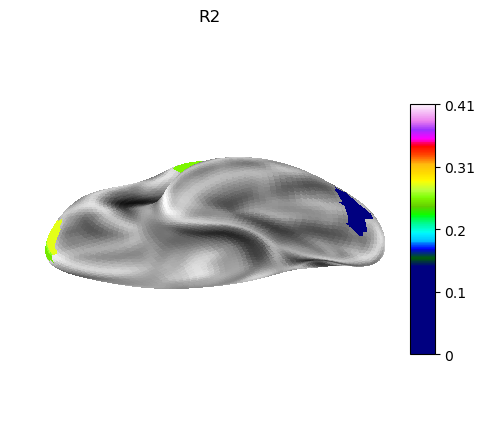

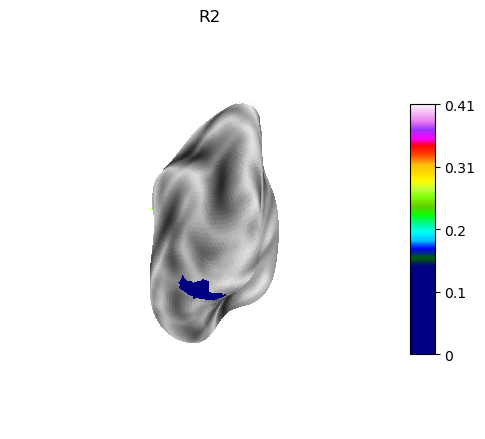

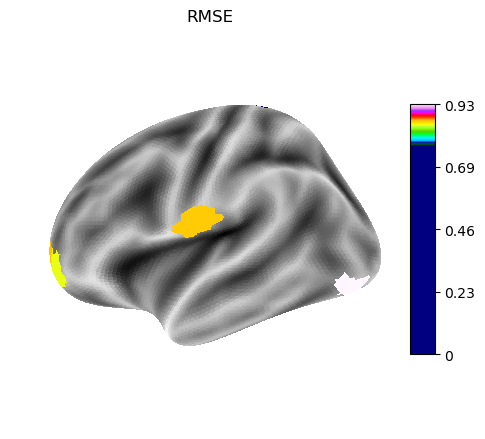

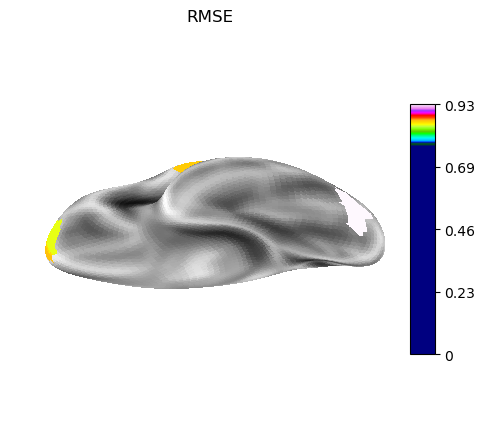

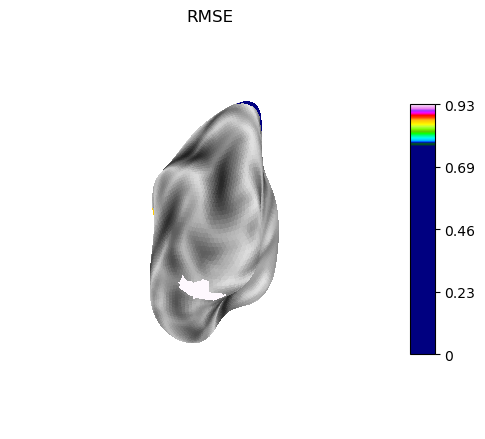

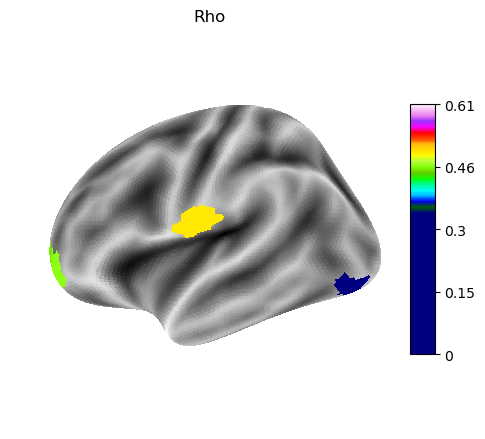

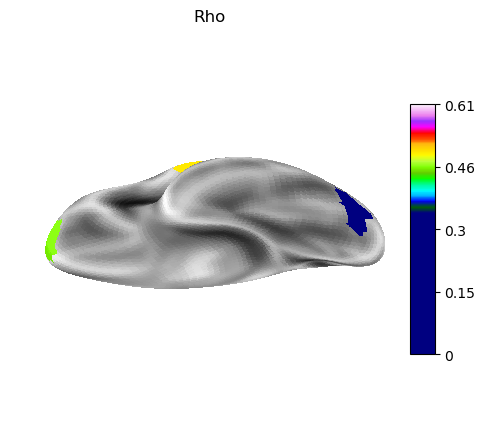

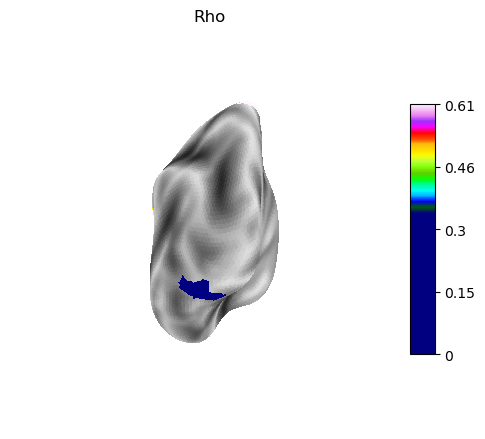

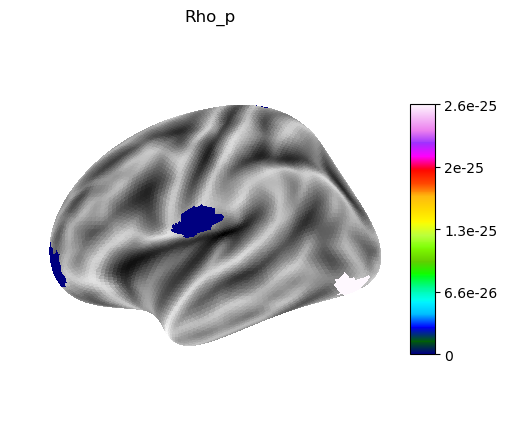

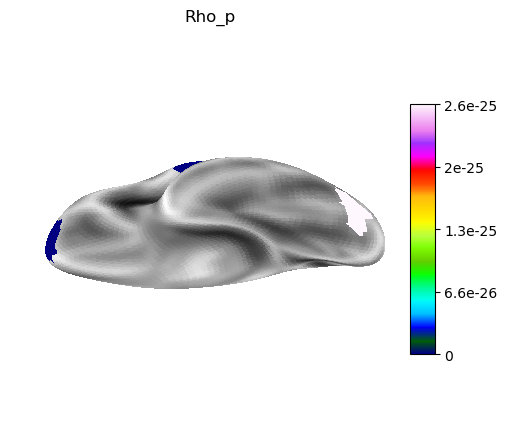

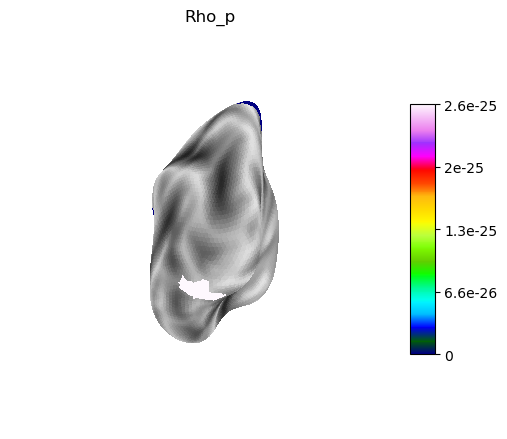

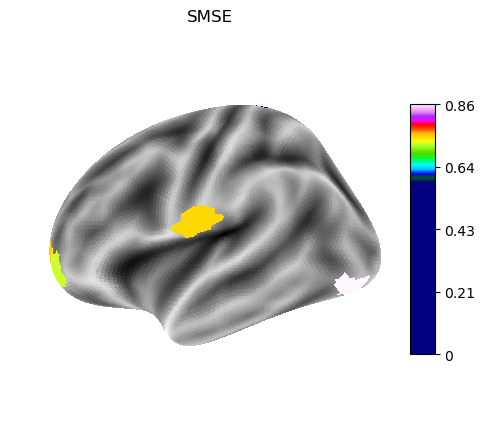

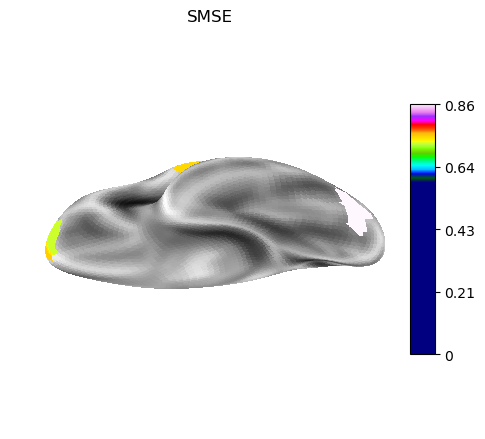

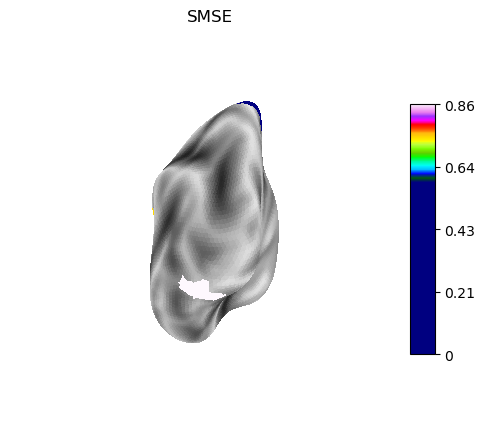

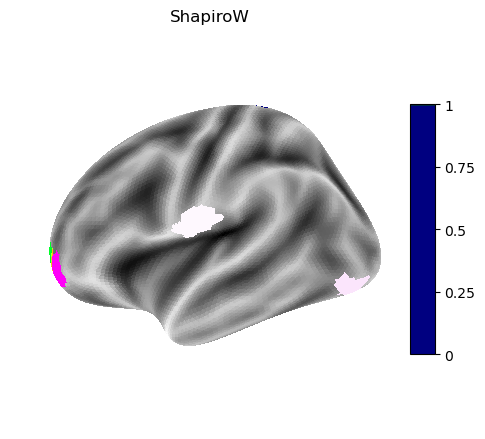

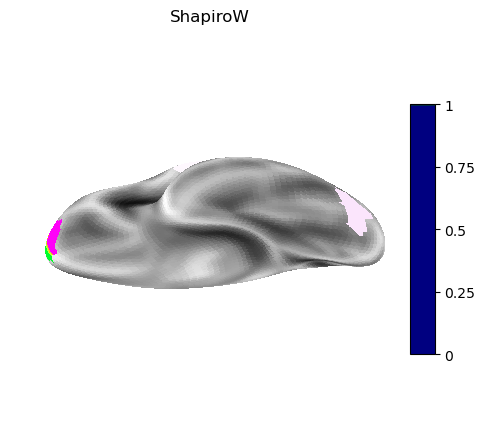

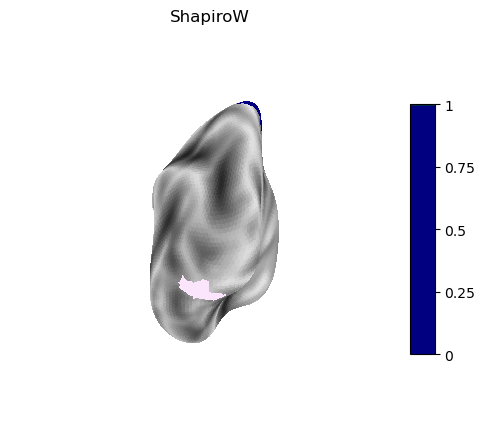

In [12]:
 # --- Load meshes (fsaverage) ---
fsavg = datasets.fetch_surf_fsaverage(mesh=MESH_RES)

# --- Load Destrieux surface atlas (labels live on fsaverage) ---
destrieux = datasets.fetch_atlas_surf_destrieux()

lh_labels = destrieux["map_left"]
label_names = list(destrieux["labels"])  # index i names the parcel with integer i in the label maps
name_to_idx = {name: i for i, name in enumerate(label_names)}


vminmax = {"EXPV":(0., 1.),
'MACE':(-10, 10),
'MAPE':(-10, 10),
'MSLL':(-10, 10),
'NLL':(-10, 10),
'R2':(-1, 1),
'RMSE':(-10, 10),
'Rho':(-10, 10),
'Rho_p':(0, 1),
'SMSE':(-10, 10),
'ShapiroW':(0, 1)}

for col in SCORE_COLS:
    vmin, vmax = vminmax[col]
    lh_destrieux.loc[:, col] = lh_destrieux[col].astype(float)
    # Make vertex-wise arrays filled with NaN so missing parcels don't bias color scaling
    lh_tex = np.full(lh_labels.shape, np.nan, dtype=float)

    # Build a dict: parcel_name -> score
    scores = dict(zip(lh_destrieux[LABEL_COL], lh_destrieux[col]))

    # Paint scores into vertices for each parcel index
    filled_count = 0
    for name, idx in name_to_idx.items():
        if name in scores and np.isfinite(scores[name]):
            val = float(scores[name])
            lh_tex[lh_labels == idx] = val
            filled_count += 1

    if filled_count == 0:
            warnings.warn(f"No parcels matched for column '{col}'. Skipping.")
            continue

    # Decide vmin/vmax
    finite_vals = lh_tex[np.isfinite(lh_tex)]
    if finite_vals.size == 0:
        warnings.warn(f"No finite values to plot for '{col}'. Skipping.")
        continue

    for iv, view in enumerate(["lateral",  "ventral", "posterior",]):
        plotting.plot_surf_stat_map(
            surf_mesh=fsavg.infl_left,
            stat_map=lh_tex,
            bg_map=fsavg.sulc_left,
            hemi='left',
            view=view,
            cmap=CMAP,
            colorbar=True,
            darkness=None,
            threshold=None,
            title=f"{col}",
        )
    plt.show()
